# [자연어처리]
# 7주차(7-2). 차원 축소(3)

# 201801544 김진원 <- 본인의 학번, 이름으로 변경하여 제출
* **모든 셀 실행** 후 제출하시기 바랍니다.
* **실습 (7-1-1)**이 있습니다. (제출 기한: 10/17(화) 23시 59분까지)

# 이제 Colab 사용에 모든 수강생분들이 어느정도 익숙해 졌을 거라 생각됩니다!
> ##### 중간 중간 **'### ... 이 부분을 완성하시오'** 라는 부분의 코드를 완성해야 합니다.





---

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

# 문자열들의 리스트
docs = ['먹고 싶은 사과',
        '먹고 싶은 바나나',
        '길고 노란 바나나 바나나',
        '저는 과일이 좋아요']### ... 이 부분을 완성하시오
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [2]:
# 총 문서의 수
N = len(docs)

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log((N+1)/(df+1))+1  #...이 부분을 완성하시오

def tfidf(t, d):
  return tf(t,d) * idf(t)  #... 이 부분을 완성하시오

In [5]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for d in docs:
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,1,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,1,1


In [6]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,1.916291
길고,1.916291
노란,1.916291
먹고,1.510826
바나나,1.510826
사과,1.916291
싶은,1.510826
저는,1.916291
좋아요,1.916291


In [7]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,1.510826,0.000000,1.916291,1.510826,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.510826,1.510826,0.000000,1.510826,0.000000,0.000000
2,0.000000,1.916291,1.916291,0.000000,3.021651,0.000000,0.000000,0.000000,0.000000
3,1.916291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.916291,1.916291


In [8]:
import numpy as np

result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_ = tfidf_ / np.linalg.norm(tfidf_, axis = 1, keepdims = True)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
df = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns=tfidfv.get_feature_names_out())
df
#print(tfidfv.vocabulary_)

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


---

## 6주차 수업 내용 리뷰 -시작-

## 6.2 PCA를 이용한 차원 축소



데이터 셋 준비 (우리에게 익숙한 20newsgroups)

In [10]:
from sklearn.datasets import fetch_20newsgroups

#20개의 토픽 중 선택하고자 하는 토픽을 리스트로 생성
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

#학습 데이터셋을 가져옴
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로 분류
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
#검증 데이터셋을 가져옴
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

X_train = newsgroups_train.data   #학습 데이터셋
y_train = newsgroups_train.target #학습 데이터셋

X_test = newsgroups_test.data     #검증 데이터셋
y_test = newsgroups_test.target   #검증 데이터셋

전처리
* 토큰화, 불용어처리, 스테밍


In [11]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴
stemmer = PorterStemmer() # 스테머로 포터스테머 사용

def my_tokenizer(text):
    tokens = RegTok.tokenize(text)
    # stopwords 제외
    words = [word for word in tokens if word not in english_stops]
    # portr stemmer 적용
    features = [stemmer.stem(token) for token in words]
    return features

In [13]:
# 약간의 시간(약 30초)이 소요됩니다.
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(tokenizer=my_tokenizer, max_features=2000, min_df=5, max_df=0.5)
# 토큰화 외에 아무것도 적용하지 않은 채로 확인
tfidf = TfidfVectorizer(tokenizer=my_tokenizer) ### ... 이 부분을 완성하시오
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
print('Original tfidf matrix shape:', X_train_tfidf.shape)

Original tfidf matrix shape: (2034, 20085)


## 6주차 수업 내용 리뷰 -끝-

---

## 6.3 tSNE를 이용한 시각화와 차원축소의 효과


 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [15]:
from sklearn.manifold import TSNE

# tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
# X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
# X_test_tfidf = tfidf.transform(X_test) # test set을 변환

tsne = TSNE(n_components=2, random_state=7, init="random") ### ... 이 부분을 완성하시오
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

TSNE dimension: (2034, 2)


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

def tsne_graph(tsne_2, label, lim=None):
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    #for i in range(500):
    for i in range(len(x)):
        #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i])
    plt.show()

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    #for i in range(500):
    for i in range(len(x)):
        #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

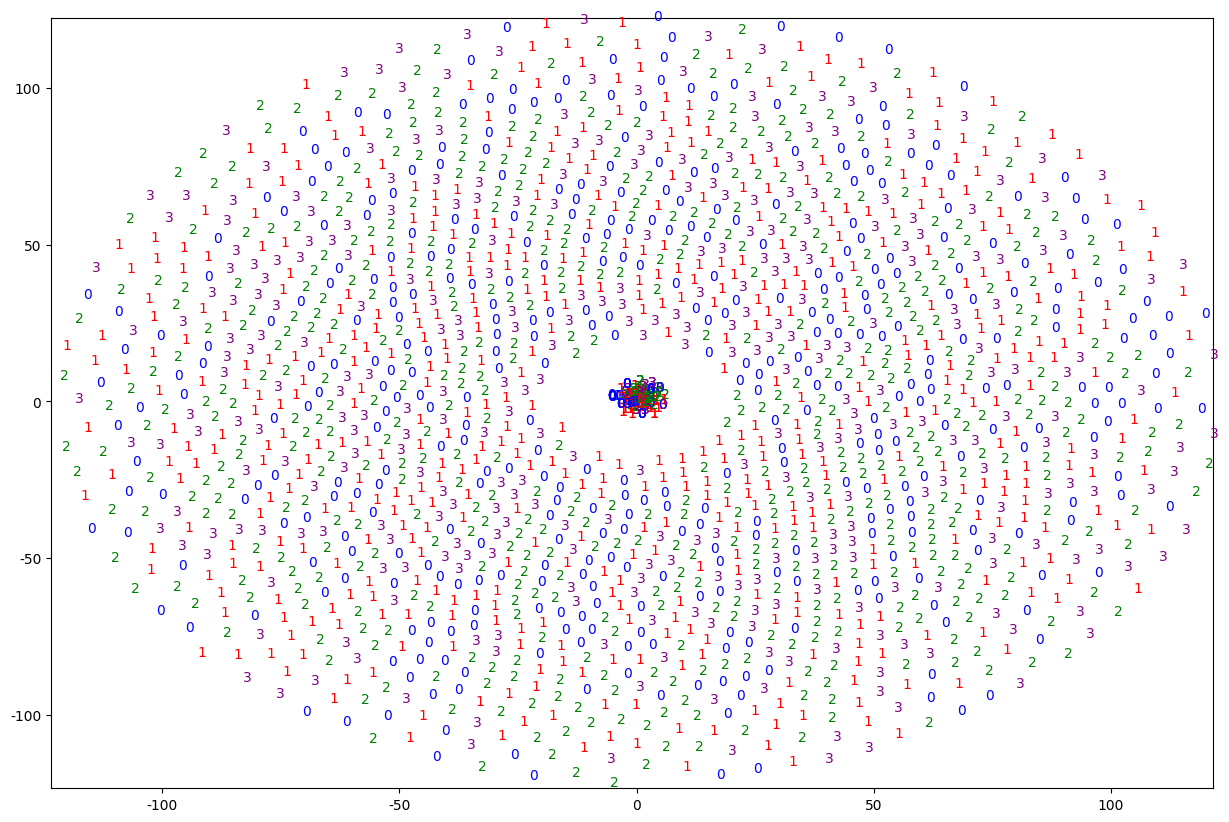

In [18]:
tsne_graph(tsne_tfidf, y_train)
# tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

In [19]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=1) ### ... 이 부분을 완성하시오
X_train_lsa = svd.fit_transform(X_train_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209


TSNE dimension: (2034, 2)
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


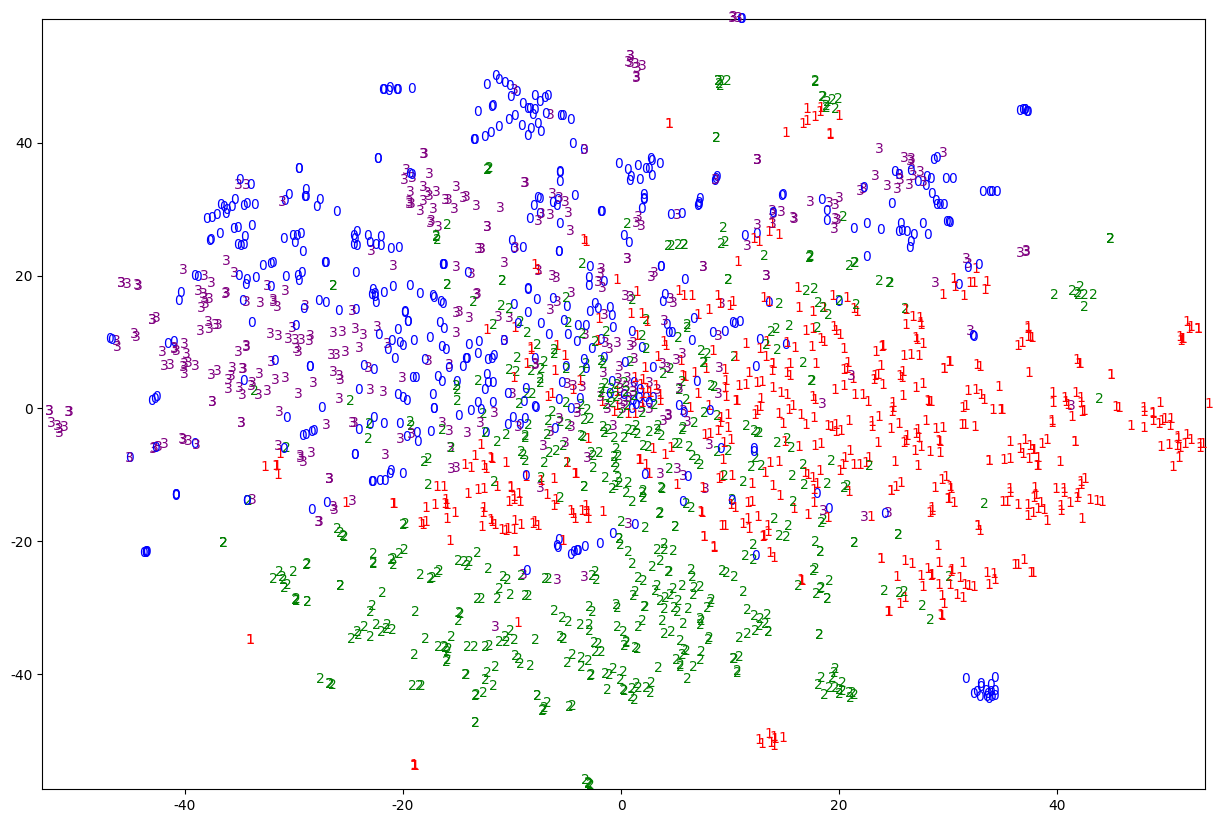

In [20]:
tsne_lsa = tsne.fit_transform(X_train_lsa)
print('TSNE dimension:', tsne_lsa.shape)
print('#Selected categories:', newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)

# [[실습 7-2]]
# 'movie_metadata.csv'의 파일을 t-SNE로 그려보기
1. ## TF-IDF 벡터를 t-SNE로 그려보기
2. ## LSA 벡터를 t-SNE로 그려보기
3. ## 아래의 코드를 이용하여 가까이에 있는 임의의 두 영화의 소개(overview)가 유사한지 살펴보기
```
filtered_rows = df[(df['title'] == "It's a Bird") | (df['title'] == "Red Beard")]
selected_columns = filtered_rows[['overview', 'title']]
selected_columns
```
# "It's a Bird", "Red Beard"는 영화 제목임. 이 부분을 변경!

---

# [참고 코드]
* ## TF-IDF로만 작성되어 있습니다.
* ## LSA로 추가 작성 필요


```
import pandas as pd
df = pd.read_csv('./movies_metadata.csv', encoding='utf-8', low_memory=False)
df.head(5)
```

```
from sklearn.model_selection import train_test_split

# 평점이 8점 이상인 영화 중에서 추천
sampled_df = df[df['vote_average'] >= 8].reset_index(drop=True)
sampled_df.shape
```

```
# overview에 빈 값이 있는 경우, ''로 채우기
sampled_df['overview'] = sampled_df['overview'].fillna('')
```

```
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(sampled_df.overview, sampled_df.title, random_state=0)

tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf = tfidf.fit_transform(X_train)
```
```
tsne = ### ... 이 부분을 완성하시오
tsne_tfidf = ### ... 이 부분을 완성하시오
print('TSNE dimension:', tsne_tfidf.shape)
```
```
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

def tsne_graph(tsne_2, label, lim=None):
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(30):
    # for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label.iloc[i])
    plt.show()
```
```
# tsne_graph(tsne_tfidf, y_train)
tsne_graph(tsne_tfidf, y_train, (-200, 200, -200, 200))
```


In [21]:
import pandas as pd
df = pd.read_csv('./movies_metadata.csv', encoding='utf-8', low_memory=False)
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [22]:
from sklearn.model_selection import train_test_split

# 평점이 8점 이상인 영화 중에서 추천
sampled_df = df[df['vote_average'] >= 8].reset_index(drop=True)
sampled_df.shape

(1895, 24)

In [23]:
# overview에 빈 값이 있는 경우, ''로 채우기
sampled_df['overview'] = sampled_df['overview'].fillna('')

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(sampled_df.overview, sampled_df.title, random_state=0)

tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf = tfidf.fit_transform(X_train)

In [25]:
tsne = TSNE(n_components=2, random_state=7, init="random")
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

TSNE dimension: (1421, 2)


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

def tsne_graph(tsne_2, label, lim=None):
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(30):
    # for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label.iloc[i])
    plt.show()

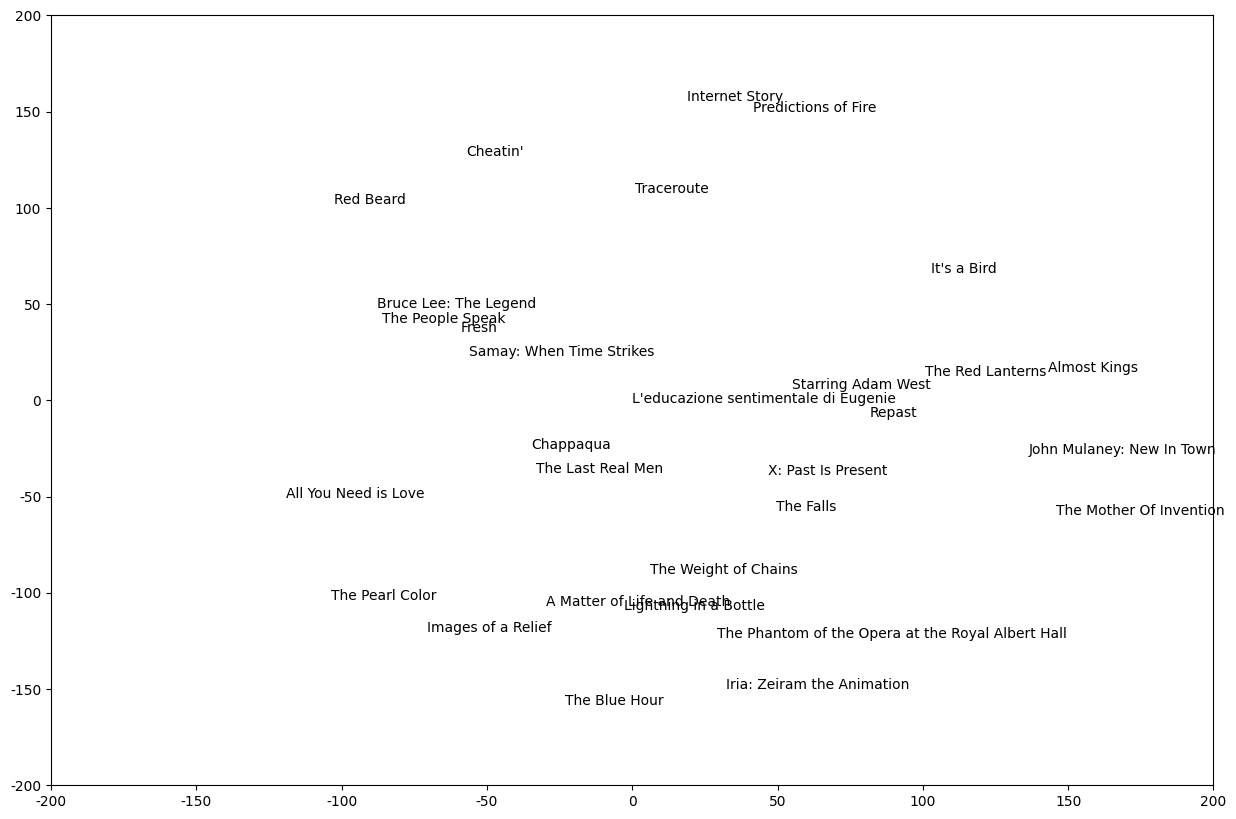

In [27]:
# tsne_graph(tsne_tfidf, y_train)
tsne_graph(tsne_tfidf, y_train, (-200, 200, -200, 200))

In [55]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=1) ### ... 이 부분을 완성하시오
X_train_lsa = svd.fit_transform(X_train_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LSA Converted X shape: (1421, 100)
Sum of explained variance ratio: 0.301


In [56]:
tsne_lsa = tsne.fit_transform(X_train_lsa)
print('TSNE dimension:', tsne_lsa.shape)
print('#Selected categories:', newsgroups_train.target_names)

TSNE dimension: (1421, 2)
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

def tsne_graph(tsne_2, label, lim=None):
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(30):
    # for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label.iloc[i])
    plt.show()

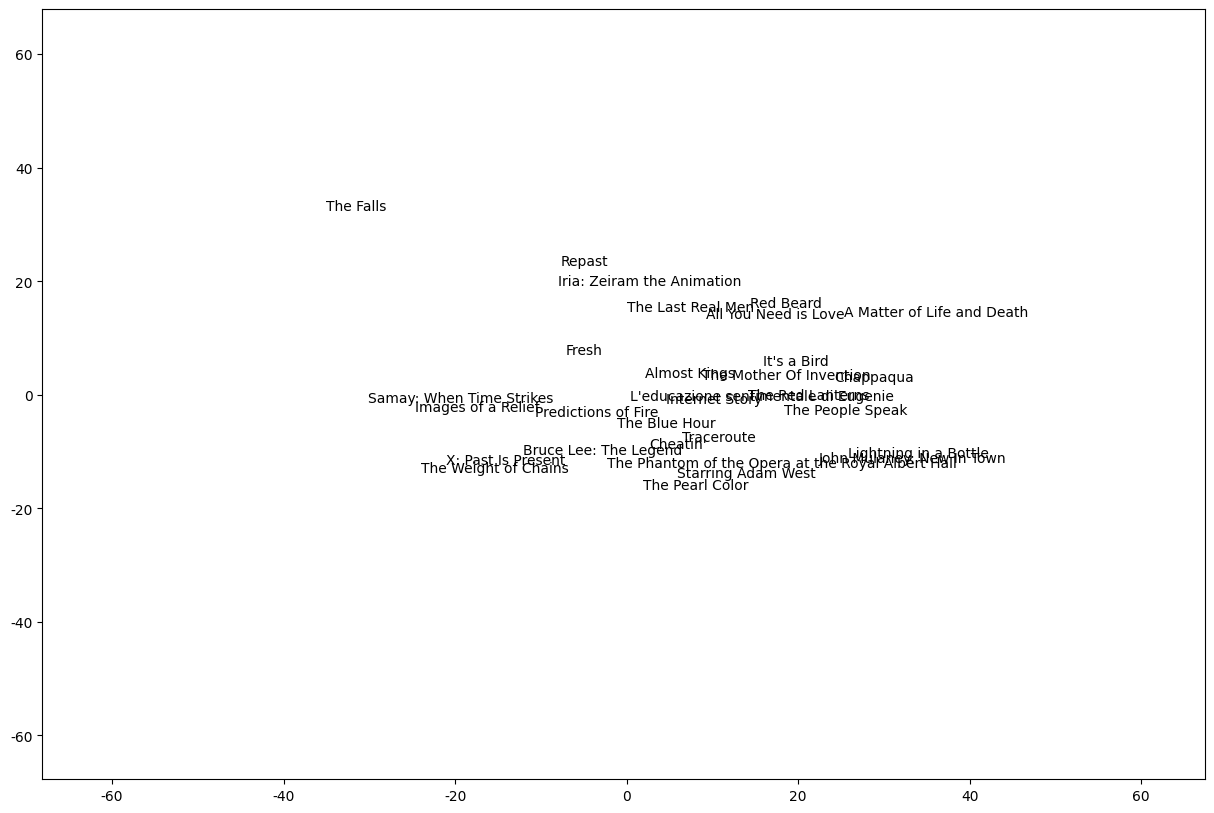

In [57]:
tsne_graph(tsne_lsa, y_train)

In [45]:
filtered_rows = df[(df['title'] == "The Pearl Color") | (df['title'] == "Starring Adam West")]
selected_columns = filtered_rows[['overview', 'title']]
selected_columns

,overview,title
24168,"A story about friendship, lie and truth...",The Pearl Color
34887,A documentary following the career ups and dow...,Starring Adam West


tf-idf의 경우 두 영화의 거리가 상당히 떨어져 있으며, LSA의 경우 두 영화가 가까이 붙어있다. 솔직히 잘 모르겠지만 그래도 두 영화리뷰 도입부가 살짝 비슷한 것 같기도 하고 LSA가 조금은 더 좋은 것 같기도 하다.

# [파일] -> [다운로드] -> [.ipynb 다운로드]
# 제출 후 **구글 계정 로그아웃** 잘 하시기 바랍니다.